In [38]:
  Breast Cancer Wisconsin (Diagnostic) — Data Exploration & Preprocessing



Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

They describe characteristics of the CELL NUCLEI present in the image.

Goal: Understand which tumor features are most important for distinguishing malignant vs benign tumors using visualizations and statistical analysis.

Aproach : Exploratory data analysis (EDA), feature correlation, grouping, and class separation plots.
Dataset: Built into `sklearn.datasets`

(-0.5, 2399.5, 882.5, -0.5)

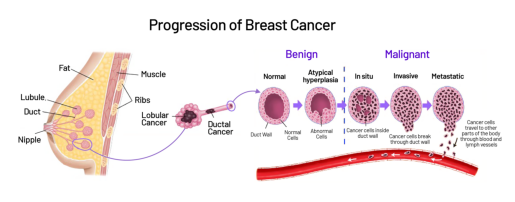

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

img = mpimg.imread("Breast-Cancer-Progression-benign-malignant.png")
plt.imshow(img)

plt.axis("off")


(-0.5, 849.5, 444.5, -0.5)

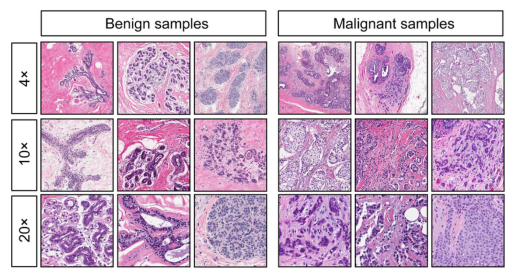

In [42]:
img2= mpimg.imread("maligne_vs_bening.png")
plt.imshow(img2)
plt.axis("off")

In [44]:

from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

# Convert to DataFrame for easier handling
df = pd.DataFrame(bc.data, columns=bc.feature_names)



In [46]:
# Load dataset from sklearn
bc = load_breast_cancer()

# Convert to DataFrame for easier handling
df = pd.DataFrame(bc.data, columns=bc.feature_names)

# Add target variable (0 = malignant, 1 = benign)
df["target"] = bc.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [48]:
# General info about features & data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [101]:

# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [50]:
# Check class distribution
df["target"].value_counts()


target
1    357
0    212
Name: count, dtype: int64

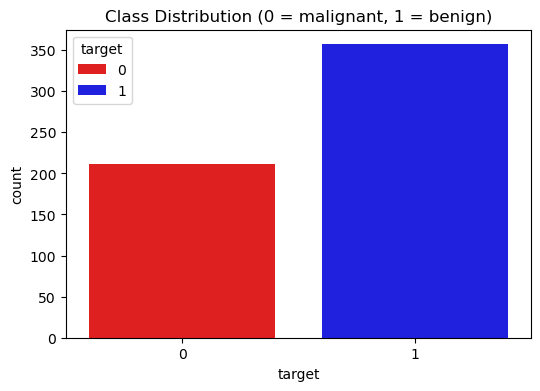

In [103]:

plt.figure(figsize=(6,4))
sns.countplot(x="target", hue="target", data=df, palette=["red", "blue"])
plt.title("Class Distribution (0 = malignant, 1 = benign)")
plt.show()


In [ ]:
RATIO:
Class 1:
357 / 569 ≈ 62.8%  BENIGN

Class 0:
212 / 569 ≈ 37.2%  MALIGN
So for every 1 benign case, there are about 0.59 malignant cases.

Or expressed cleanly:

Malignant : Benign ≈ 0.59 : 1

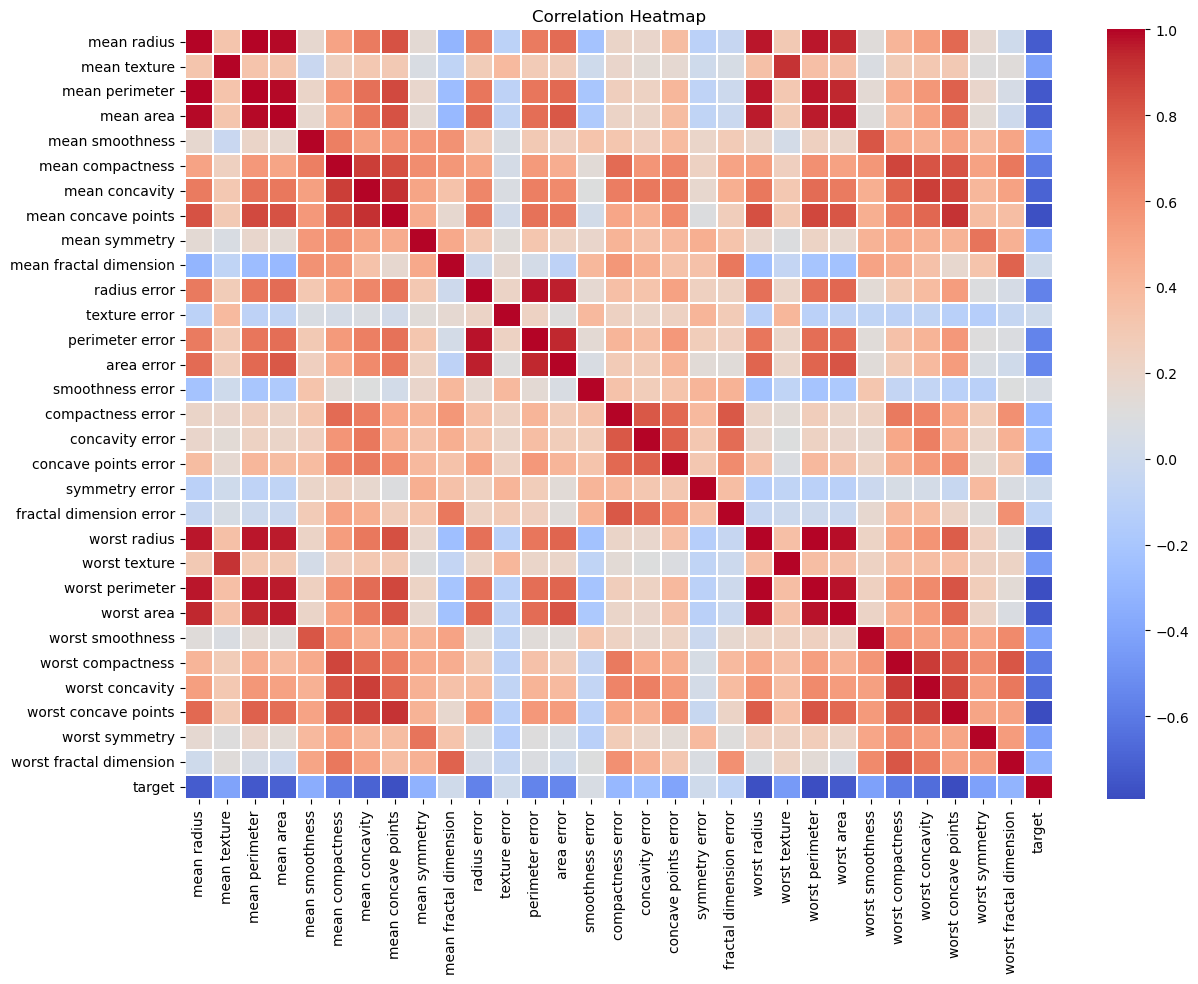

In [136]:
# Correlation Heatmap
# Select numeric columns only
numeric_df = df.select_dtypes(include='number').drop(columns=['target_num'], errors='ignore')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.2, annot=False)  # annot=False keeps it clean
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
Observations from the correlation heatmap

Strong correlations among size
perimeter_mean, and area_mean are highly positively correlated (close to +1).


 This confirms that larger tumors tend to have larger perimeter and area, which is biologically expected.

Shape irregularities correlate with size but less strongly

Features like concavity_mean and concave points_mean show moderate positive correlation with size features.

This indicates that more irregular tumors tend to be slightly larger, but not always.


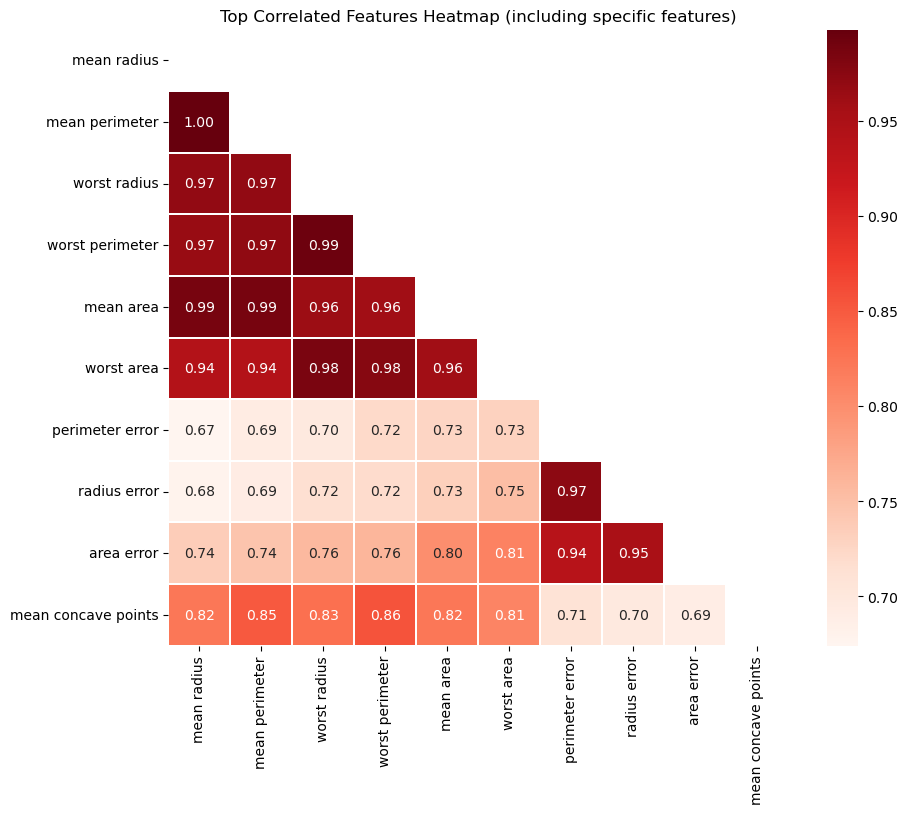

In [197]:
#Top Correlated Features Heatmap 

# Select numeric columns and remove 'target_num' if it exists
numeric_df = df.select_dtypes(include='number').drop(columns=['target_num'], errors='ignore')

# Compute absolute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Replace diagonal with 0 to ignore self-correlation
np.fill_diagonal(corr_matrix.values, 0)

# Find the maximum correlation for each feature
max_corr_per_feature = corr_matrix.max()

# Select top N features with the strongest correlation
top_features = max_corr_per_feature.sort_values(ascending=False).head(10).index.tolist()

# Forcefully include specific features if missing
required_features = ['mean concave points', 'mean radius']
for f in required_features:
    if f not in top_features:
        top_features.append(f)

# Create filtered correlation matrix
filtered_corr_matrix = corr_matrix.loc[top_features, top_features]

# Create mask for upper triangle
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, mask=mask, cmap="Reds", linewidths=0.2, annot=True, fmt=".2f")
plt.title("Top Correlated Features Heatmap (including specific features)")
plt.show()





In [ ]:
High-Correlation Features — Quick Interpretation

1. Shape / Boundary Complexity Cluster

mean concavity,mean concave points, worst concavity, worst concave points
These describe edge irregularity. Tumors with more concavities also have more concave points, so these measures rise together.
➡️ Indicates boundary distortion.

2. Size / Geometry Cluster

area_worst, radius_worst, perimeter_worst, mean area
These measure overall tumor size. Larger radius → larger perimeter → larger area.
➡️ Indicates tumor mass/volume scale.

Summary:
The heatmap reveals two major correlated groups:

Shape features (irregular edges)

Size features (overall growth)

These clusters are expected and reflect underlying physical relationships in tumor structure.

In [186]:
corr_with_target = df.corr(numeric_only=True)["target"].abs().sort_values(ascending=False)
top5 = corr_with_target[1:7]  # skip target itself
top5


target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
Name: target, dtype: float64

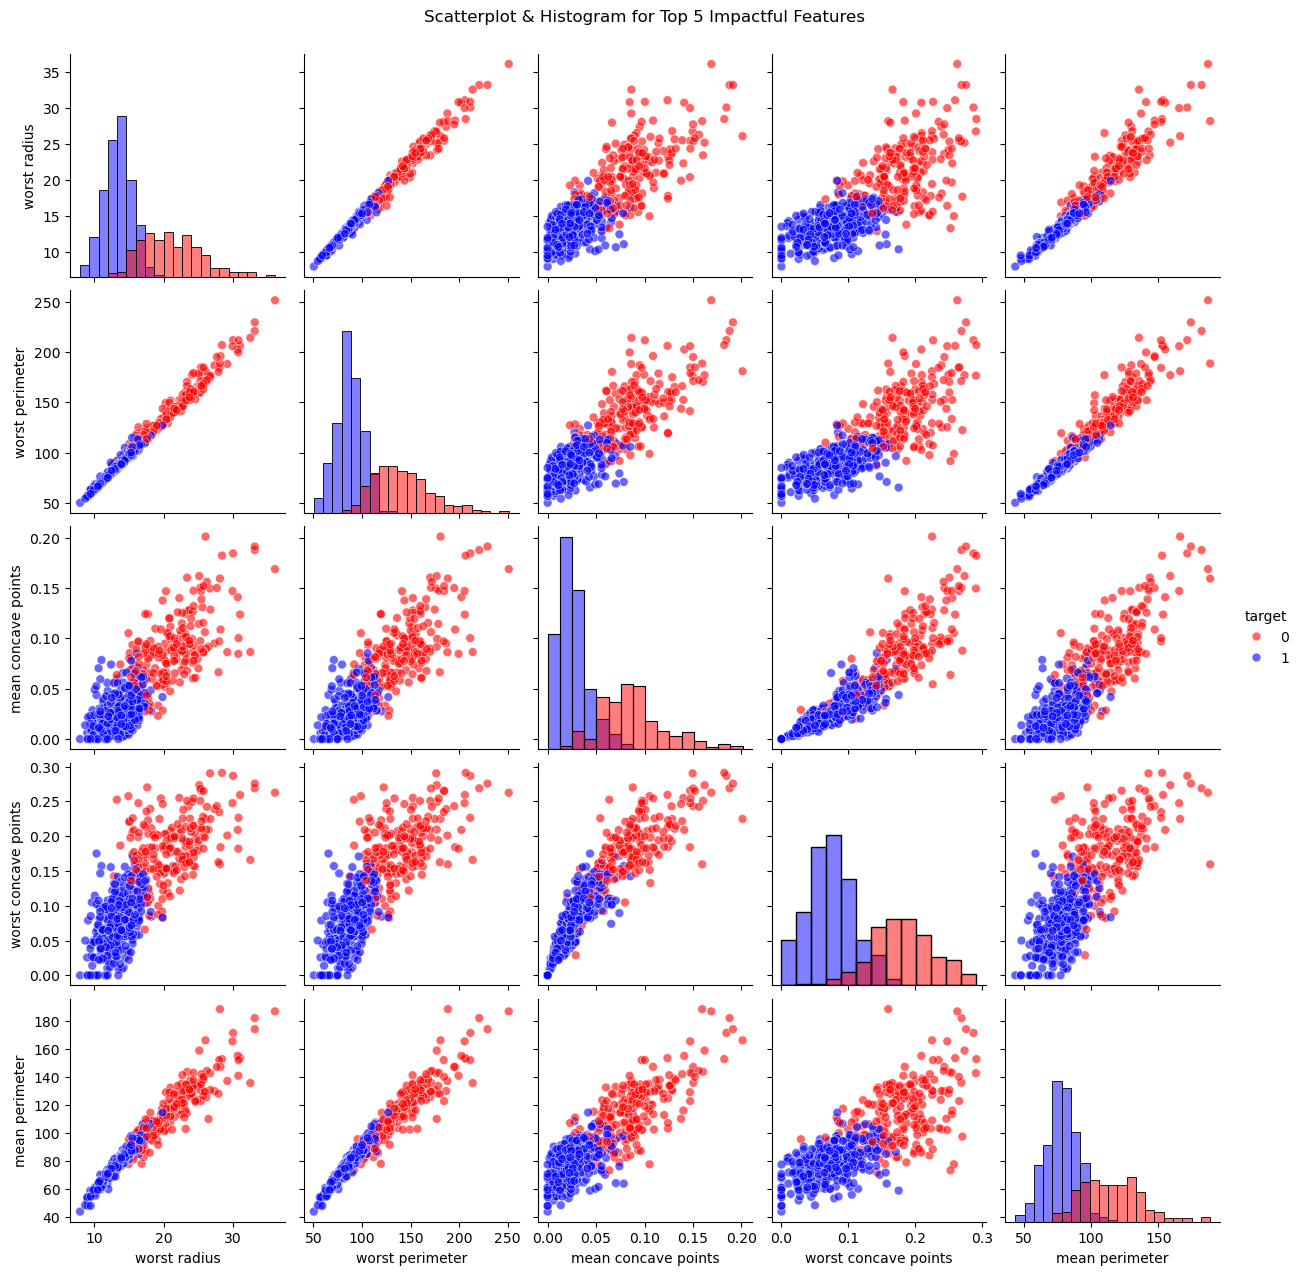

In [199]:

# Select only the 5 most impactful features + target
top_features = ['worst radius', 'worst perimeter', 'mean concave points', 'worst concave points', 'mean perimeter']

# Pairplot
sns.pairplot(df[top_features + ['target']], 
             hue='target', palette=['red', 'blue'], 
             diag_kind='hist', plot_kws={'alpha':0.6, 's':40})

plt.suptitle("Scatterplot & Histogram for Top 5 Impactful Features", y=1.02)
plt.show()


In [ ]:
Interpretation of the Pairplot

Purpose: The plot shows the relationships among the top 5 most impactful features and their distributions by class (malignant vs benign).

Diagonals: Histograms show the distribution of each feature, separated by target class. You can see how malignant tumors (red) and benign tumors (blue) differ in each feature.

Off-diagonal: Scatterplots reveal correlations between feature pairs:

Features like worst radius and worst perimeter are strongly positively correlated → larger tumors tend to have longer perimeters.

Features related to concavity (mean concave points, worst concave points) also cluster together → irregular shapes are associated with malignancy.

Class separation: Malignant (red) points tend to occupy higher values in size and shape irregularity features, while benign (blue) points cluster at lower values.

Overall: This visualization confirms that these features capture size and shape irregularity, which are the most informative for distinguishing malignant vs benign tumors.

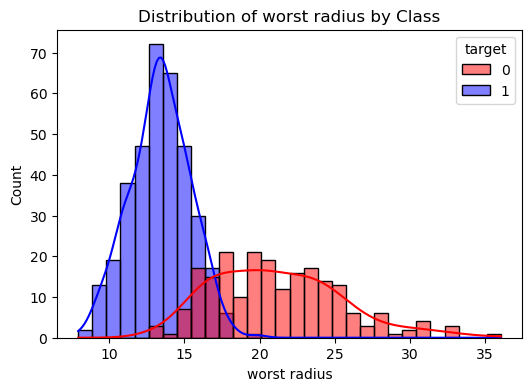

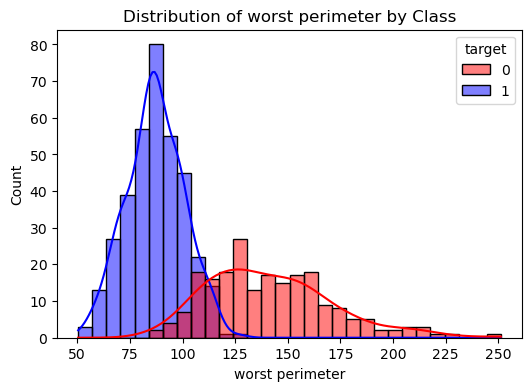

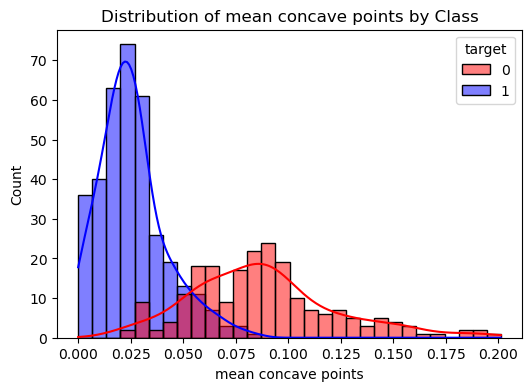

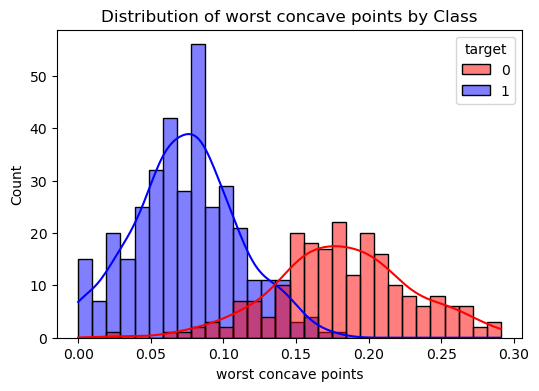

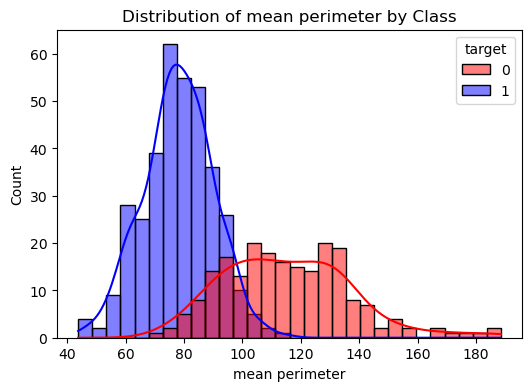

In [261]:
# Top 5 impactful features
top_features = ['worst radius', 'worst perimeter', 'mean concave points',
                'worst concave points', 'mean perimeter']

# Loop over features to plot
for feature in top_features:
    plt.figure(figsize=(6,4))
    
    # Histogram + KDE by class
    sns.histplot(data=df, x=feature, hue='target', bins=30, 
                 kde=True, palette=['red','blue'], alpha=0.5)
    
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()


In [ ]:
Interpretation of Feature Distributions

Malignant tumors (red) generally have higher values in all top features compared to benign tumors (blue).

Size-related features (worst radius, worst perimeter, mean perimeter) show clear separation — malignant tumors are larger.

Shape irregularity features (mean concave points, worst concave points) are also higher for malignant tumors — edges are more irregular.

Overlap exists for some values, indicating not all features alone perfectly separate the classes.

Overall, these distributions confirm that size and boundary irregularity are the most informative for distinguishing malignant vs benign tumors.

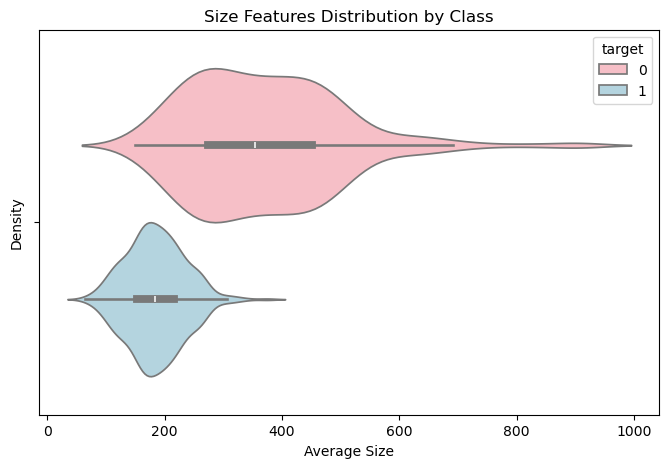

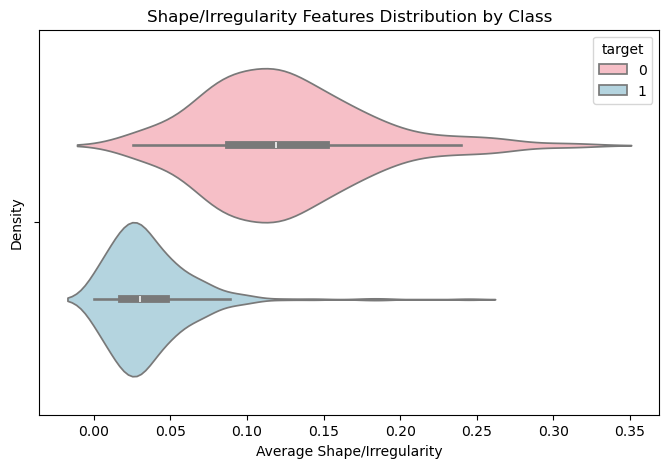

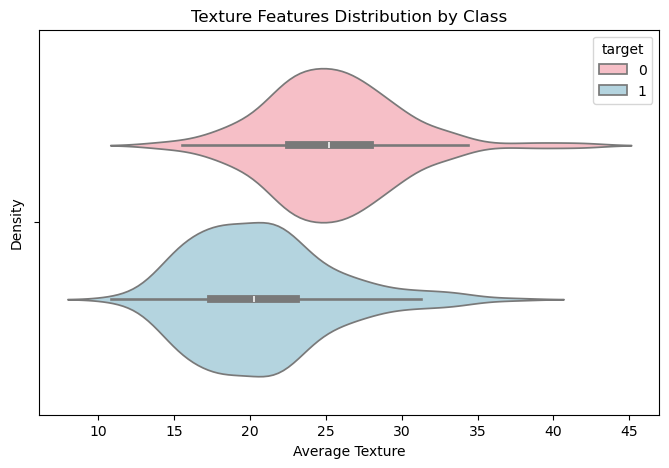

In [267]:
#Grouping Features for a better clue

# Define feature groups
size_features = ['mean radius', 'mean perimeter', 'mean area']
shape_features = ['mean concave points', 'mean concavity']
texture_features = ['mean texture', 'worst texture']

# Create grouped features by averaging
df['size_group'] = df[size_features].mean(axis=1)
df['shape_group'] = df[shape_features].mean(axis=1)
df['texture_group'] = df[texture_features].mean(axis=1)

# Plot all three groups 
# Plot Size Features
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='size_group', hue='target', fill=True, palette=['lightpink','lightblue'])
plt.title("Size Features Distribution by Class")
plt.xlabel("Average Size")
plt.ylabel("Density")
plt.show()

# Plot Shape/Irregularity Features
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='shape_group', hue='target', fill=True, palette=['lightpink','lightblue'])
plt.title("Shape/Irregularity Features Distribution by Class")
plt.xlabel("Average Shape/Irregularity")
plt.ylabel("Density")
plt.show()

# Plot Texture Features
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='texture_group', hue='target', fill=True, palette=['lightpink','lightblue'])
plt.title("Texture Features Distribution by Class")
plt.xlabel("Average Texture")
plt.ylabel("Density")
plt.show()
plt.show()


In [ ]:
Interpretation 

 Size features: Malignant tumors tend to have higher size_group values → larger overall tumors
 Shape/irregularity features: Malignant tumors have more concave points / concavity → irregular edges.
 Texture features: Slightly higher values for malignant tumors, showing subtle internal differences.

    Outliers are important to note because: 
  *They may indicate rare but real tumor characteristics*
Overall: Grouping features helps visualize trends more clearly than individual features and highlights which properties drive malignancy.

In [ ]:
Final Conclusions: Breast Cancer Data Analysis

Implications for Cancer Detection:

Most impactful factors: Tumor size and boundary irregularity.

Texture features provide secondary support.

Feature grouping and correlation analysis improve interpretability and can guide model selection and preprocessing.

Insights can be used to build predictive models, reduce feature redundancy, and enhance clinical decision-making.